<a href="https://colab.research.google.com/github/kevinmcmanus/Astrophysics/blob/master/AstropyTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

```
Byte-by-byte Description of file: nhi_hpx.dat
--------------------------------------------------------------------------------
   Bytes Format  Units   Label     Explanations
--------------------------------------------------------------------------------
   1-  8  I8     ---     HPX       HPX index (HPXINDEX)
  10- 18  F9.5   deg     RAdeg     Right ascension (J2000)
  20- 28  F9.5   deg     DEdeg     Declination (J2000)
  30- 38  F9.5   deg     GLON      Galactic longitude (J2000)
  40- 48  F9.5   deg     GLAT      Galactic latitude (J2000)
  50- 71  E22.15 cm-2    NHI       HI column density
--------------------------------------------------------------------------------
```

In [2]:

url = 'https://cdsarc.unistra.fr/ftp/J/A+A/594/A116/nhi_hpx.dat.gz'
cols = ['HPX', 'RAdeg','DEdeg','GLON','GLAT', 'NHI']

hi4pi = pd.read_csv(url, delim_whitespace=True, names=cols, header=None)

In [3]:
hi4pi.head()

,HPX,RAdeg,DEdeg,GLON,GLAT,NHI
0,0,192.90971,27.13788,45.0,89.95431,9.174280e+19
1,1,192.84877,27.17301,135.0,89.95431,9.244184e+19
2,2,192.80931,27.11878,225.0,89.95431,9.394214e+19
3,3,192.87024,27.08366,315.0,89.95431,9.281170e+19
4,4,192.96046,27.11176,22.5,89.90863,9.085496e+19


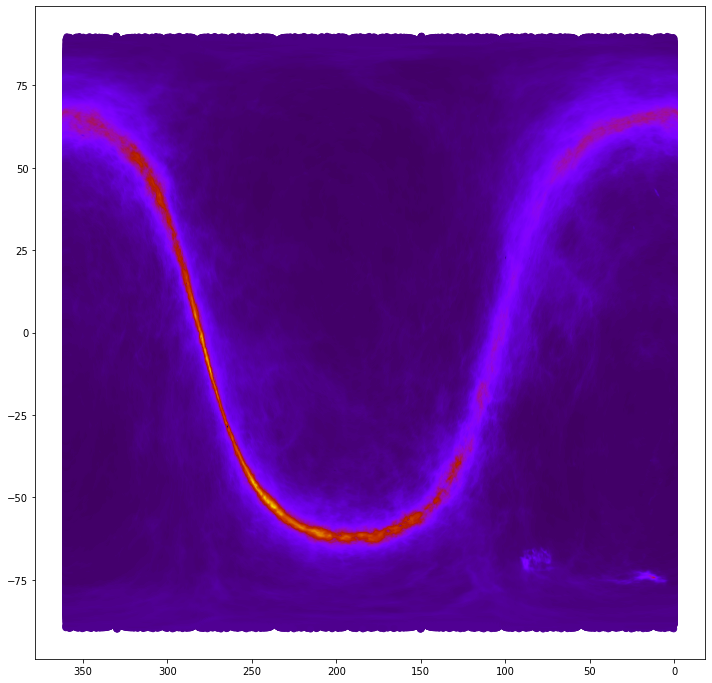

In [ ]:
#don't run this code -- takes 20 minutes
#fig = plt.figure(figsize=(12,12))
#ax = fig.add_subplot(111)
#ax.scatter(hi4pi.RAdeg, hi4pi.DEdeg, c=hi4pi.NHI, cmap='gnuplot')
#ax.invert_xaxis()

In [ ]:
np.round(np.pi, 1)

3.1

In [74]:
hi4pi['RAdeg1'] = np.round(hi4pi.RAdeg,1)
hi4pi['DEdeg1'] = np.round(hi4pi.DEdeg, 1)

In [75]:
hi4pi1 = hi4pi[['RAdeg1', 'DEdeg1', 'NHI']].groupby(['RAdeg1','DEdeg1']).mean().reset_index()

In [76]:
hi4pi1.head()

,RAdeg1,DEdeg1,NHI
0,0.0,-88.5,8.180530e+20
1,0.0,-87.3,8.229257e+20
2,0.0,-84.9,7.213047e+20
3,0.0,-84.2,7.731364e+20
4,0.0,-83.4,7.742778e+20


In [ ]:
len(hi4pi)

12582912

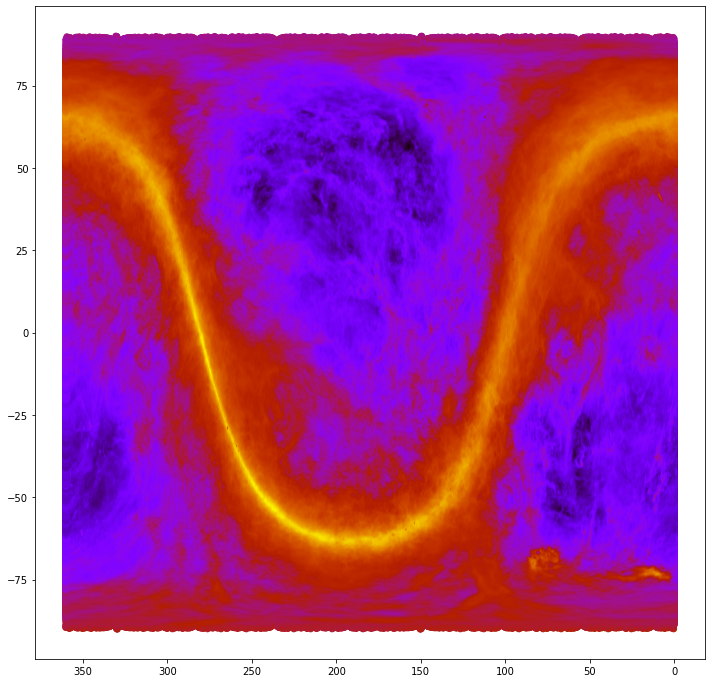

In [ ]:
#this takes a while too!
#fig = plt.figure(figsize=(12,12))
#ax = fig.add_subplot(111)
#ax.scatter(hi4pi1.RAdeg1, hi4pi1.DEdeg1, c=hi4pi1.NHI, cmap='gnuplot', norm=colors.LogNorm())
#ax.invert_xaxis()

In [20]:
# reduce resolution to 3600 x 1800
rastep = 0.1 # tenth degree steps
decstep = 0.1 # tenth degree steps


In [21]:
hi4pi['RAint'] = (hi4pi.RAdeg//rastep).astype(int)
hi4pi['DEint'] = ((90+hi4pi.DEdeg)//decstep).astype(int)


In [22]:
hi4pi.head()

,HPX,RAdeg,DEdeg,GLON,GLAT,NHI,RAint,DEint
0,0,192.90971,27.13788,45.0,89.95431,9.174280e+19,1929,1171
1,1,192.84877,27.17301,135.0,89.95431,9.244184e+19,1928,1171
2,2,192.80931,27.11878,225.0,89.95431,9.394214e+19,1928,1171
3,3,192.87024,27.08366,315.0,89.95431,9.281170e+19,1928,1170
4,4,192.96046,27.11176,22.5,89.90863,9.085496e+19,1929,1171


In [27]:
hi4pi_01 = hi4pi[['RAint','DEint','NHI']].groupby(['DEint','RAint']).mean().reset_index()
hi4pi_image = pd.pivot_table(hi4pi_01,index='DEint',columns='RAint', values='NHI',aggfunc=np.mean).to_numpy( copy=True)

In [26]:
ra_vec = np.linspace(0,360, 3600,  endpoint=False)
dec_vec= np.linspace(-90,90,1800, endpoint=False)

In [31]:
decdec, rara = np.meshgrid(dec_vec, ra_vec)

In [33]:
decdec.shape

(3600, 1800)

In [35]:
xx=np.arange(10)

In [39]:
xx[:len(xx)-1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


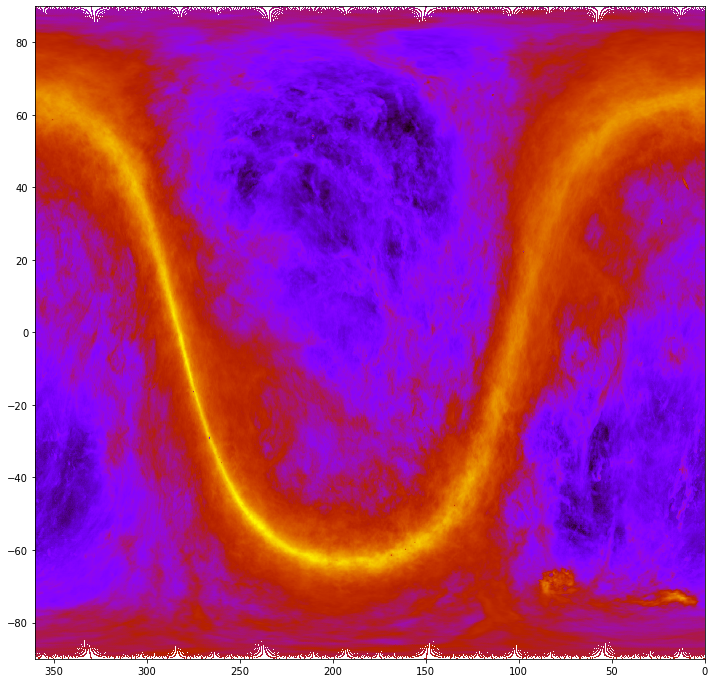

In [44]:

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.pcolormesh(ra_vec,dec_vec, hi4pi_image, cmap='gnuplot', norm=colors.LogNorm())
ax.invert_xaxis()

In [50]:
from astropy.coordinates import Angle
import astropy.units as u

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


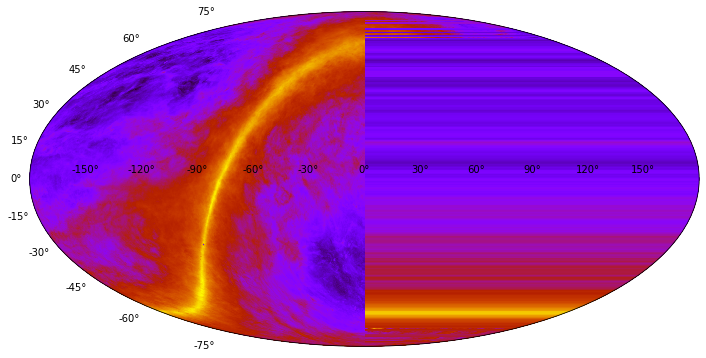

In [68]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='mollweide')
#ax.pcolormesh(Angle(ra_vec*u.degree).wrap_at(180*u.degree).radian,
#              Angle(dec_vec*u.degree).radian,
#              hi4pi_image, cmap='gnuplot', norm=colors.LogNorm())
ax.scatter(hi4pi1.RAdeg1, hi4pi1.DEdeg1, c=hi4pi1.NHI, cmap='gnuplot', norm=colors.LogNorm())

#ax.invert_xaxis()

In [66]:
Angle(90*u.degree).wrap_at('180d').radian

1.5707963267948966

In [79]:
hi4pi1.head()

,RAdeg1,DEdeg1,NHI
0,0.0,-88.5,8.180530e+20
1,0.0,-87.3,8.229257e+20
2,0.0,-84.9,7.213047e+20
3,0.0,-84.2,7.731364e+20
4,0.0,-83.4,7.742778e+20


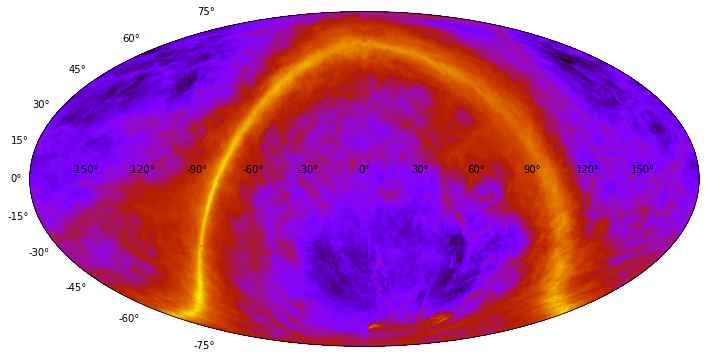

In [80]:
#this takes a while too!
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='mollweide')
ax.scatter(Angle(np.array(hi4pi1.RAdeg1)*u.degree).wrap_at(180*u.degree).radian,
           Angle(np.array(hi4pi1.DEdeg1)*u.degree).radian,
           c=hi4pi1.NHI, cmap='gnuplot', norm=colors.LogNorm())
#ax.invert_xaxis()

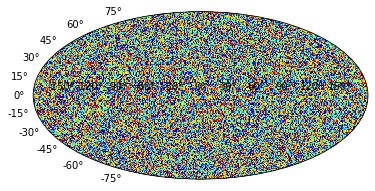

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='mollweide')
arr = np.random.rand(180, 360)

lon = np.linspace(-np.pi, np.pi,360)
lat = np.linspace(-np.pi/2., np.pi/2.,180)
Lon,Lat = np.meshgrid(lon,lat)

im = ax.pcolormesh(Lon,Lat,arr, cmap=plt.cm.jet)

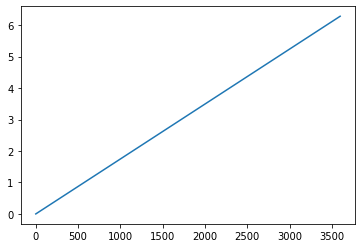

In [70]:
plt.plot(Angle(ra_vec*u.degree).radian)